# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>
Olá boa tarde Suelen, obri


<div class="alert alert-block alert-danger">

<b>Comentário da revisora V1: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Alexandre! 

O seu projeto apresenta pontos positivos, tais como: 
    - Código bem estruturado
    - Comentários pertinentes a análise
    - Gráficos de boa qualidade
    
O projeto necessita do ajuste no filtro de usuários da região EU. Adicionei um comentário para te auxiliar na resolução. 

Fico à disposição para eventuais dúvidas.

Boa sorte!
</div>

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Obrigada pelos ajustes! O projeto está aprovado.
</div>

### Objetivo: O objetivo principal desta análise é avaliar o impacto de uma nova funcionalidade de sistema de recomendação em um site de e-commerce internacional. Especificamente, o estudo visa determinar se a nova funcionalidade melhora a conversão dos usuários nas seguintes etapas: 
1) Visualizações das páginas dos produtos;
2) Adicionando itens ao carrinho;
3) Compras;


### Primeira parte: 
* Importação das bibliotecas.
* Leitura dos data frames e criação de objetos com seu conteúdo.
* Verificação e conversão (se necessária) dos tipos de dados de todos os data frames.
* Análises de valores ausentes e duplicados em todos os data frames. 

In [59]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [60]:
# Lendo e armazenando os data frames

marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [61]:
# Começando o processamento dos dados do data frame marketing_events
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [62]:
# Conferindo os tipos de dados
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [63]:
# No data frame marketing_events vamos converter o tipo de dados das colunas "start_dt" e "finish_dt" 
# para seu tipo correto, que é data. 
# Convertendo as colunas de data para o tipo datetime
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

In [64]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [65]:
# Conferindo se existem valores duplicados no data frame. 
marketing_events.duplicated().sum()

0

* Não existem valores ausentes no data frame marketing_events
* Não existem valores duplicados no data framme marketing_events
* Os tipos de dados foram convertidos para seu tipo ideal. 

In [66]:
# Começando o processamento dos dados do data frame new_users
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [67]:
# Checando os tipos dos dados e se tem valores ausentes no data frame new_users
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [68]:
# Convertendo a coluna "first_date" para o tipo correto
new_users['first_date']= pd.to_datetime(new_users['first_date'])

In [69]:
new_users.first_date.min()

Timestamp('2020-12-07 00:00:00')

In [70]:
new_users.duplicated().sum()

0

* O data frame "new_users" não tem valores ausentes e nem duplicados.
* Os dados foram convertidos para o seu tipo correto.

In [71]:
# Iniciando o pré-processamento de dados do data frame "events"
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [72]:
# Avaliando os tipos de dados e verificando valores ausentes
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [73]:
# Criei um data frame auxiliar e notei que todos os valores da coluna "details" são os valores de compra
# dos clientes que compraram alguma coisa, então vou substituir os valores ausentes por 0.
df_aux1= events[events['event_name'] == 'purchase']
df_aux1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60314 entries, 0 to 60313
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     60314 non-null  object 
 1   event_dt    60314 non-null  object 
 2   event_name  60314 non-null  object 
 3   details     60314 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.3+ MB


In [74]:
# Convertendo a coluna "event_dt" para o tipo correto
events['event_dt']= pd.to_datetime(events['event_dt'])

In [75]:
# Verificando valores duplicados
events.duplicated().sum()

0

In [76]:
# A coluna "details" contêm valores ausentes, vamos substituí-los por 0 conforme explicado célula acima
# Usando a função fillna para substituir os valores ausentes por 0
events['details'].fillna(0, inplace = True)

In [77]:
# Poodemos notar que não existem valores ausentes no data frame
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     423761 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


* Os valores ausentes no data frame "events" foram substituídos por 0.
* A coluna "event_dt" foi convertida para o tipo certo.
* Não existem valores duplicados no data frame. 

In [78]:
# Pré-processando os dados do data frame "participants"
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [79]:
# Verificando o tipo de dados e se existem valores ausentes
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [80]:
# Verificando se existem valores duplicados
participants.duplicated().sum()

0

* Não existem valores duplicados no data frame "participants".
* Não existem valores ausentes no data frame "participants".
* Os tipos dos dados estão corretos. 

<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

- Os dados foram carregados e processados corretamente   
- Comentários foram adicionados explicando o racional do código  
</div>

### Segunda Parte:
#### Nesta parte vamos responder as seguintes perguntas:
* Estudar a conversão em diferentes etapas do funil;
* O número de eventos por usuário é distribuído igualmente entre as amostras?
* Os usuários de ambas as amostras estão presentes?
* Como o número de eventos é distribuído entre os dias?
* Existem quaisquer particularidades nos dados que você deve considerar antes de começar o teste A/B?

In [81]:
# primeiro data frame sobre eventos de markenting
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [82]:
new_users.first_date.min()

Timestamp('2020-12-07 00:00:00')

In [83]:
# segundo data frame tem os usuários que se cadastraram na loja entre 7 e 21 de dezembro de 2020
new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [84]:
events.event_dt.min()

Timestamp('2020-12-07 00:00:33')

In [85]:
# O terceiro data frame tem todos os eventos dos novos usuários de 7 de dezembro a 1 de janeiro de 2021
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [86]:
# O quarto data frame tem uma tabela com os participantes do teste
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [87]:
# Mesclando os data frames events e participants 
merged_df = events.merge(participants, on = 'user_id', how = 'left')
merged_df.head()

,user_id,event_dt,event_name,details,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,NaN,NaN


<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O teste requer os seguintes critérios: 
    Grupos: A (controle)m B (funil de novos pagamentos)   
    Data de início: 07-12-2020   
    Data de quando paparam de receber novos usuários: 21-12-2020   
    Data de término: 01-01-2021     
    **Público: 15% de novos usuários da região da UE** - É necessário garantir que 15% dos novos usuários sejam da região da UE.   
    
Para isso, é recomendado um código semelhante a esse:  
            
    novos_usuarios_UE = usuarios[(usuarios['region'] == 'EU') & (usuarios['first_date'] >= '2020-12-07') &     (usuarios['first_date'] <= '2020-12-21')]
                                                                                                                                           
    total_novos_usuarios = len(novos_usuarios_UE)

    porcentagem_novos_usuarios_UE = (total_novos_usuarios / len(usuarios)) * 100

    print("Porcentagem de novos usuários da UE:", porcentagem_novos_usuarios_UE)
</div>

In [88]:
new_users_UE = new_users[(new_users['region'] == 'EU') & (new_users['first_date'] >= '2020-12-07') &  (new_users['first_date'] <= '2020-12-21')]

total_novos_usuarios = len(new_users_UE)

porcentagem_novos_usuarios_UE = (total_novos_usuarios / len(new_users)) * 100

print("Porcentagem de novos usuários da UE:", porcentagem_novos_usuarios_UE)

Porcentagem de novos usuários da UE: 67.22995417610684


In [ ]:
Voce iria adicionar algum comentário nessa parte?

In [89]:
# Criando um funil de conversão para todos os usuários do grupo A e do teste recommender_system_test
funil_df_A = (merged_df[(merged_df['group'] == 'A') & (merged_df['ab_test'] == 'recommender_system_test')]
              .groupby('event_name').size()
              .reindex(['login', 'product_page', 'product_cart', 'purchase']))

funil_df_A = funil_df_A.reset_index(name='visits')

funil_df_A['visits_shifted'] = funil_df_A['visits'].shift(1)
funil_df_A['conversion'] = funil_df_A['visits'].div(funil_df_A['visits_shifted'])

funil_df_A


,event_name,visits,visits_shifted,conversion
0,login,8272,NaN,NaN
1,product_page,5328,8272.0,0.644101
2,product_cart,2482,5328.0,0.465841
3,purchase,2545,2482.0,1.025383


* Na célula acima existe uma curiosidade que deve ser mencionada, os valores de purchase são maiores do que os valores de product_cart, ou seja, tem que ser averiguado se é possível o cliente ir direto da página do produto para a compra, sem passar pelo evento product_cart.
* A coluna conversion mostra a taxa de conversão para cada etapa do funil do grupo A.


In [111]:
# Calcular o número total de usuários em cada grupo
len(merged_df[merged_df['group'] == 'A'])

58705

In [90]:
# Criando um funil de conversão para todos os usuários do grupo B
funil_df_B = (merged_df[(merged_df['group'] == 'B') & (merged_df['ab_test'] == 'recommender_system_test')]
              .groupby(['event_name']).size()
              .reindex(['login', 'product_page', 'product_cart', 'purchase']))

funil_df_B = funil_df_B.reset_index(name='visits')

funil_df_B['visits_shifted'] = funil_df_B['visits'].shift(1)
funil_df_B['conversion'] = funil_df_B['visits'].div(funil_df_B['visits_shifted'])

funil_df_B


,event_name,visits,visits_shifted,conversion
0,login,2565,NaN,NaN
1,product_page,1374,2565.0,0.535673
2,product_cart,678,1374.0,0.493450
3,purchase,665,678.0,0.980826


* O funil do grupo B apresenta bem menos usuários do que o funil do grupo A para o teste 'recommender_system_test', que é o que está sendo analisado.
* Contudo a conversão do evento product_page para o evento product_cart	é maior para o grupo B.
* A conversão do evento product_cart para purchase é menor para o grupo B.

In [91]:
merged_df_2 = pd.merge(new_users,participants, on='user_id', how='left')
merged_df_2.head()

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,F1C668619DFE6E65,2020-12-07,N.America,Android,NaN,NaN
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
3,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone,NaN,NaN


In [92]:
# Verificando se o número de eventos por usuário é distribuído igualmente entre as amostras
# Contando o número de eventos por usuário
events_per_user = merged_df.groupby(['user_id', 'group']).size().reset_index(name='num_events')
events_per_user.head()


,user_id,group,num_events
0,0002CE61FF2C4011,A,12
1,001064FEAAB631A1,B,12
2,0010A1C096941592,A,12
3,001E72F50D1C48FA,B,6
4,002412F1EB3F6E38,A,6


In [93]:
# Calculando a média de eventos por usuário para cada grupo
mean_events_per_user = events_per_user.groupby('group')['num_events'].mean().reset_index(name='mean_events')

# Calculando outras métricas úteis, como o número total de usuários por grupo e o desvio padrão dos eventos
additional_metrics = (events_per_user.groupby('group')['num_events']
                      .agg(total_users='count', total_events='sum', std_events='std')
                      .reset_index())
group_metrics = mean_events_per_user.merge(additional_metrics, on='group')
group_metrics


,group,mean_events,total_users,total_events,std_events
0,A,7.45555,7874,58705,4.475159
1,B,7.11249,6205,44133,4.246201


* Notamos que o grupo A tem mais usuários, tem mais eventos, e consequentemente tem uma maior média de eventos por usuário.

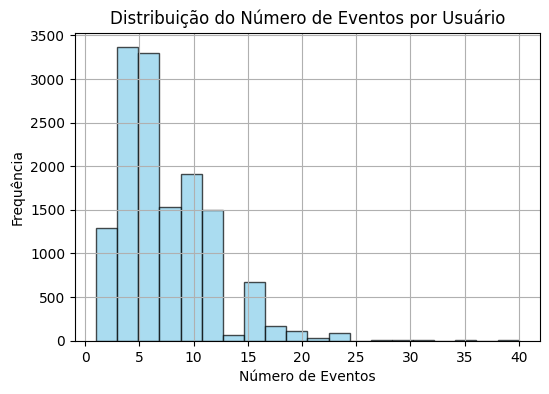

In [94]:
# Plotando um histograma para a distribuição do número de eventos por usuário
plt.figure(figsize=(6, 4))
plt.hist(events_per_user['num_events'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição do Número de Eventos por Usuário')
plt.xlabel('Número de Eventos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [95]:
# Analisando números de eventos para cada grupo
# Separando os dados por grupo
events_per_user_A = events_per_user[events_per_user['group'] == 'A']['num_events']
events_per_user_B = events_per_user[events_per_user['group'] == 'B']['num_events']

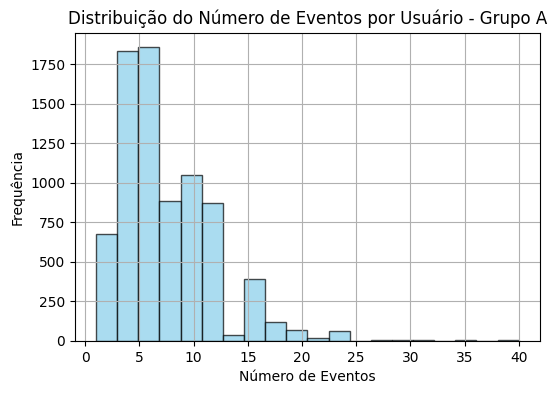

In [96]:
# Histograma da distribuição de eventos para o grupo A
plt.figure(figsize=(6, 4))
plt.hist(events_per_user_A, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição do Número de Eventos por Usuário - Grupo A')
plt.xlabel('Número de Eventos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

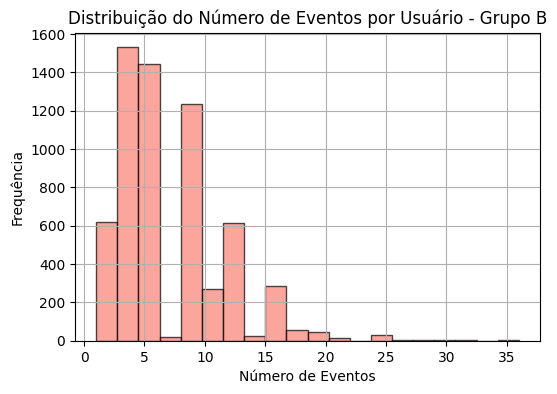

In [97]:
# Histograma da distribuição de eventos para o grupo B
plt.figure(figsize=(6, 4))
plt.hist(events_per_user_B, bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Distribuição do Número de Eventos por Usuário - Grupo B')
plt.xlabel('Número de Eventos')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


In [98]:
# Descobrindo o número de eventos por dia

# Extraindo somente o dia da coluna event_dt e atribuindo a uma nova coluna event_date
merged_df['event_date'] = merged_df['event_dt'].dt.date

# Contando o número de eventos por dia
events_per_day = merged_df.groupby('event_date').size().reset_index(name='número de eventos por dia')
events_per_day.head()


,event_date,número de eventos por dia
0,2020-12-07,11570
1,2020-12-08,12690
2,2020-12-09,12299
3,2020-12-10,14229
4,2020-12-11,14002


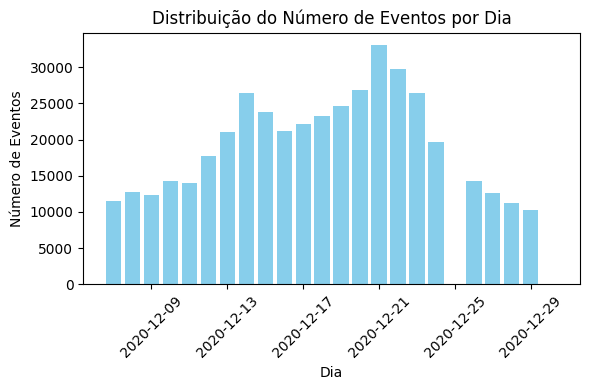

In [99]:
# Histograma para a distribuição do número de eventos por dia
plt.figure(figsize=(6, 4))
plt.bar(events_per_day['event_date'], events_per_day['número de eventos por dia'], color='skyblue')
plt.title('Distribuição do Número de Eventos por Dia')
plt.xlabel('Dia')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* A célula acima mostra a distribuição de eventos por dia.
* Nota-se que no natal não teve nenhum evento. 

In [100]:
# Aqui vamos descobrir os usuários que estão nos dois grupos A e B
usuarios_A = merged_df[merged_df['group']=='A']['user_id']
usuarios_B = merged_df[merged_df['group']=='B']['user_id']
set(set(usuarios_A) & set(usuarios_B))

{'0082295A41A867B5',
 '00E68F103C66C1F7',
 '02313B9E82255F47',
 '04F2CF340B4F3822',
 '051D59BC38C3B3AA',
 '067D05BD30F04F2E',
 '08589AA89496453B',
 '0980BF24051C806A',
 '0A0141A363E2E051',
 '0ADFFFE9C0D60092',
 '0B0D84A866817D84',
 '0BA00E790AA510C1',
 '0BC7C730D40D19D3',
 '0C2E77C6A381704A',
 '0CA93D3A4A1D8389',
 '0CC466ED84E0756D',
 '0D77D907C24CDAC1',
 '0DABE6F3956778ED',
 '0DB417842D3B79A2',
 '0EA9AB1C2A159C77',
 '0EBE4BDE16D19DC0',
 '0EE3092A08562765',
 '0FBF679EA1340786',
 '10779B9305942526',
 '10F028FB8193F8C1',
 '115ABCFDBDDB5950',
 '123C3AC236BE84F0',
 '124B6B7F19141CCC',
 '12A77BCF101643B5',
 '133F64DC5E24F047',
 '1381632DA8AD52C0',
 '1382E5D05428EBCD',
 '13AA9B89A2885F8E',
 '13AE4DFAC67ACEB3',
 '13B7E3DA955377BA',
 '13FBEB715F4AAE10',
 '14AEC962812EB706',
 '1675B921AC721DBE',
 '16BE66466549CD42',
 '1796009027406E06',
 '17DD74F263374528',
 '198FEF39910DCF76',
 '1A4A33FE1C0FDD90',
 '1AD9F88DA92AC4E5',
 '1B52830A832D33F5',
 '1C5874DE0D952A0D',
 '1C711C65356BCFBF',
 '1C7C7C34158

In [101]:
# Descobrindo a quantidade de usuários que estão nos dois grupos
len(set(usuarios_A) & set(usuarios_B))

441

In [102]:
# Removendo usuários que estão nos dois grupos 
usuarios_A = merged_df[merged_df['group']=='A']['user_id']
usuarios_B = merged_df[merged_df['group']=='B']['user_id']

df_aux_1 = merged_df[(~merged_df['user_id'].isin(set(usuarios_A) & set(usuarios_B))) &
          (merged_df['ab_test'].notna())]
df_aux_1


,user_id,event_dt,event_name,details,group,ab_test,event_date
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test,2020-12-07
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,A,interface_eu_test,2020-12-07
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,A,interface_eu_test,2020-12-07
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,B,interface_eu_test,2020-12-07
...,...,...,...,...,...,...,...
429448,75845C83258FBF73,2020-12-30 06:42:52,login,0.00,B,recommender_system_test,2020-12-30
429450,4584E51B99DE51AE,2020-12-30 07:39:32,login,0.00,A,interface_eu_test,2020-12-30
429451,9DF4F595A906A0BA,2020-12-30 18:28:55,login,0.00,B,interface_eu_test,2020-12-30
429470,6181F3835EBE66BF,2020-12-30 12:00:00,login,0.00,A,interface_eu_test,2020-12-30


* Uma particularidade que notei antes de começar o teste A/B, é que existiam 441 usuários que estavam tanto no grupo A quanto no grupo B, ou seja, isso não deveria acontecer.
* Sendo assim, esses usuários foram removidos para que não exerçam influência nos resultados do teste.
* Outra particularidade, é que existem dois testes no mesmo conjunhto de dados, o interface_eu_test e o recommender_system_test, dessa forma, usaremos os dados para o teste A/B dos usuários provenientes do teste recommender_system_test, que é o foco da nossa análise. 

In [103]:
df_aux_1.head()

,user_id,event_dt,event_name,details,group,ab_test,event_date
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,B,interface_eu_test,2020-12-07
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,A,interface_eu_test,2020-12-07
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,A,interface_eu_test,2020-12-07
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,B,interface_eu_test,2020-12-07


#### Terceira Parte: Teste de Hipóteses
* Testaremos duas hipóteses nesta parte do projeto.
 1) Hipótese 1: O valor médio de compras do grupo A é igual aos valores do grupo B.
 2) Hipótese 2: O grupo A tem a taxa de conversão igual a do o grupo B.
* Será aplicado também um teste Z para verificar a significância estatística das proporções.

In [104]:
# Filtrando o data frame para permanecer somente os usuários do teste recommender_system_test	
final_df= df_aux_1[df_aux_1['ab_test'] == 'recommender_system_test']
final_df.head()

,user_id,event_dt,event_name,details,group,ab_test,event_date
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,A,recommender_system_test,2020-12-07
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,A,recommender_system_test,2020-12-07
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,B,recommender_system_test,2020-12-07
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,A,recommender_system_test,2020-12-07
75,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,B,recommender_system_test,2020-12-07


In [105]:
# Aplicando o teste estatístico
# Testando a hipótese que a média de compras do grupo A é igual a média de compras do grupo B.

grupo_A = final_df[final_df['group'] == 'A']['details']
grupo_B = final_df[final_df['group'] == 'B']['details']

# Calculando as médias de compras dos dois grupos
media_A = grupo_A.mean()
media_B = grupo_B.mean()

print(f'Média do grupo A: {media_A}')
print(f'Média do grupo B: {media_B}')


# Realizando o teste t 
t_stat, p_value = stats.ttest_ind(grupo_A, grupo_B, alternative='greater')

print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: a média de compra do grupo A não é igual a média de compra do grupo B.")
else:
    print("Não rejeitamos a hipótese nula: não há evidência suficiente de que a média de compra do grupo A é diferente da média de compra do grupo B.")


Média do grupo A: 3.1759454886082072
Média do grupo B: 2.9659687433097845
P-value: 0.3203203905147278
Não rejeitamos a hipótese nula: não há evidência suficiente de que a média de compra do grupo A é diferente da média de compra do grupo B.


* Aplicando o teste estatístico, podemos verificar que não existem diferenças significativas na média de compras do grupo A e do grupo B.

In [106]:
# Aplicando o teste estatístico e verificando se as taxas de conversão tem diferença significativa

# Contando o número total de usuários em cada grupo
total_usuarios_A = final_df[final_df['group'] == 'A']['user_id'].nunique()
total_usuarios_B = final_df[final_df['group'] == 'B']['user_id'].nunique()

print(f'Total de usuários no grupo A: {total_usuarios_A}')
print(f'Total de usuários no grupo B: {total_usuarios_B}')

# Contando o número de conversões em cada grupo
conversoes_A = final_df[(final_df['group'] == 'A') & (final_df['event_name'] == 'purchase')]['user_id'].nunique()
conversoes_B = final_df[(final_df['group'] == 'B') & (final_df['event_name'] == 'purchase')]['user_id'].nunique()

print(f'Número de conversões no grupo A: {conversoes_A}')
print(f'Número de conversões no grupo B: {conversoes_B}')

# Calculando a taxa de conversão para cada grupo
taxa_conversao_A = conversoes_A / total_usuarios_A
taxa_conversao_B = conversoes_B / total_usuarios_B

print(f'Taxa de conversão do grupo A: {taxa_conversao_A}')
print(f'Taxa de conversão do grupo B: {taxa_conversao_B}')

# Contagens de conversões e usuários
count = [conversoes_A, conversoes_B]
nobs = [total_usuarios_A, total_usuarios_B]

# Realizando o teste z para proporções 
stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f'Z-statistic: {stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("Rejeitamos a hipótese nula: a taxa de conversão do grupo A é maior do que a taxa de conversão do grupo B.")
else:
    print("Não rejeitamos a hipótese nula: não há evidência suficiente de que a taxa de conversão do grupo A é maior do que a taxa de conversão do grupo B.")


Total de usuários no grupo A: 2422
Total de usuários no grupo B: 812
Número de conversões no grupo A: 773
Número de conversões no grupo B: 228
Taxa de conversão do grupo A: 0.3191577208918249
Taxa de conversão do grupo B: 0.28078817733990147
Z-statistic: 2.0467289116192875
P-value: 0.02034235445026142
Rejeitamos a hipótese nula: a taxa de conversão do grupo A é maior do que a taxa de conversão do grupo B.


<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Sugestão: Após o cálculo de taxa de conversão, é possível gerar um gráfico semelhante a esse: 
    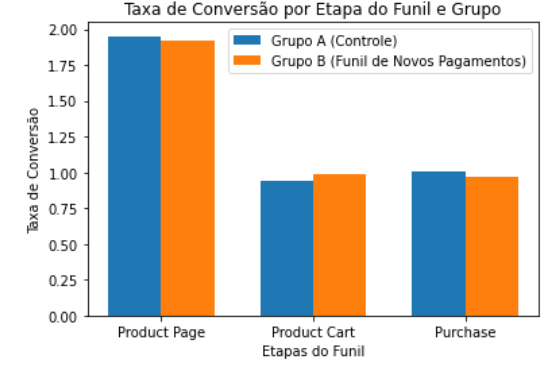


</div>

* Após aplicar o teste z e verificarmos se existe uma diferença significativa entre as proporções de conversões dos dois grupos, notamos que o grupo A tem uma melhor taxa de conversão do que o grupo B, e que existe diferença significativa entre as duas proporções. 

#### Conclusões Gerais:
* O grupo A demonstra ter atraído uma maior quantidade de usuários.
* O grupo A tem uma média de eventos por usuário maior do que o grupo B.
* O grupo A tem um total de eventos maior do que o grupo B.
* Em todas as etapas do funil, existem mais usuários do grupo A do que do grupo B.
* A taxa de conversão entre os eventos product_page e product_cart é ligeiramente maior no grupo B, contudo no grupo A existem clientes que vão direto da página do produto para a compra. 
* Não existe diferença significativa entre o valor médio de compras dos dois grupos. 
* Existe uma diferença significativa na conversão do grupo A em comparação com o grupo B.
* 